In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/AIML_IITG/Datasets/customer_data_IITG.csv")
print(df.head())

  CustomerID  Gender  Age  Tenure  MonthlyCharges  TotalCharges  \
0      C0001    Male   56      70          116.76       8056.09   
1      C0002  Female   69      11           74.80        656.86   
2      C0003  Female   46      16           62.35       1026.92   
3      C0004    Male   32      59           76.85       4485.39   
4      C0005    Male   60      70           77.59       5457.46   

         Contract     PaymentMethod InternetService  Churn  
0  Month-to-Month       Credit Card             DSL      1  
1  Month-to-Month      Mailed Check             DSL      1  
2  Month-to-Month     Bank Transfer             DSL      0  
3        One Year  Electronic Check              No      0  
4  Month-to-Month      Mailed Check     Fiber Optic      0  


In [5]:
print(df.tail())

    CustomerID  Gender  Age  Tenure  MonthlyCharges  TotalCharges  \
245      C0246    Male   34      68           88.72       6032.39   
246      C0247  Female   55      58          104.44       6050.86   
247      C0248    Male   41      29           94.96       2496.07   
248      C0249  Female   22      36           23.05        773.56   
249      C0250    Male   69      21          106.72       2272.57   

           Contract  PaymentMethod InternetService  Churn  
245        One Year  Bank Transfer     Fiber Optic      0  
246  Month-to-Month    Credit Card              No      1  
247  Month-to-Month    Credit Card             DSL      1  
248  Month-to-Month   Mailed Check             DSL      0  
249        Two Year  Bank Transfer              No      0  


In [6]:
print(df.isnull().sum())

CustomerID         0
Gender             0
Age                0
Tenure             0
MonthlyCharges     0
TotalCharges       5
Contract           0
PaymentMethod      0
InternetService    0
Churn              0
dtype: int64


In [27]:
print("Data Shape",df.shape)

Data Shape (250, 9)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       250 non-null    object 
 1   Gender           250 non-null    object 
 2   Age              250 non-null    int64  
 3   Tenure           250 non-null    int64  
 4   MonthlyCharges   250 non-null    float64
 5   TotalCharges     245 non-null    float64
 6   Contract         250 non-null    object 
 7   PaymentMethod    250 non-null    object 
 8   InternetService  250 non-null    object 
 9   Churn            250 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 19.7+ KB
None


In [9]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [10]:
print(df["TotalCharges"].isnull().sum())

0


In [28]:
print("Missing Values:\n",df.isnull().sum())

Missing Values:
 Gender             0
Age                0
Tenure             0
MonthlyCharges     0
TotalCharges       0
Contract           0
PaymentMethod      0
InternetService    0
Churn              0
dtype: int64


In [12]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'Contract', 'PaymentMethod', 'InternetService',
       'Churn'],
      dtype='object')


In [13]:
print(df["Contract"].unique())
print(df["PaymentMethod"].unique())
print(df["InternetService"].unique())

['Month-to-Month' 'One Year' 'Two Year']
['Credit Card' 'Mailed Check' 'Bank Transfer' 'Electronic Check']
['DSL' 'No' 'Fiber Optic']


In [19]:
cat_col = ['Contract', 'PaymentMethod', 'InternetService',"Gender"]
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for col in cat_col:
  df[col]=en.fit_transform(df[col])

In [20]:
print(df.head())

   Gender  Age  Tenure  MonthlyCharges  TotalCharges  Contract  PaymentMethod  \
0       1   56      70          116.76       8056.09         0              1   
1       0   69      11           74.80        656.86         0              3   
2       0   46      16           62.35       1026.92         0              0   
3       1   32      59           76.85       4485.39         1              2   
4       1   60      70           77.59       5457.46         0              3   

   InternetService  Churn  
0                0      1  
1                0      1  
2                0      0  
3                2      0  
4                1      0  


In [21]:
df = df.drop(columns="CustomerID",axis=1)

KeyError: "['CustomerID'] not found in axis"

In [25]:
X = df.drop(columns="Churn",axis=1)
y = df["Churn"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
from sklearn.linear_model import LinearRegression,LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
print("Test set Evaluation: ")
print(f"Accuracy: {accuracy_score(y_test,y_pred):.3f}")
print(f"Precision: {precision_score(y_test,y_pred):.3f}")
print(f"Recall: {recall_score(y_test,y_pred):.3f}")
print(f"F1 score: {f1_score(y_test,y_pred):.3f}")

Test set Evaluation: 
Accuracy: 0.813
Precision: 0.714
Recall: 0.652
F1 score: 0.682


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[46  6]
 [ 8 15]]


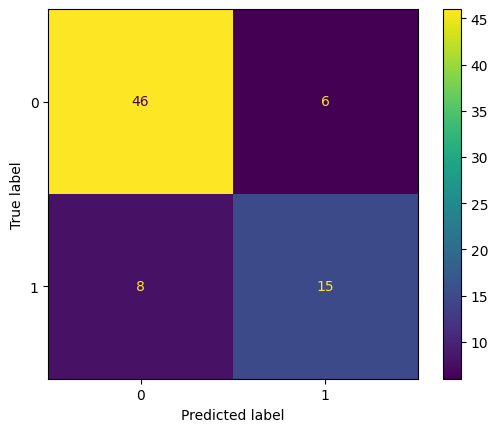

In [26]:
conf = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf)
print(ConfusionMatrixDisplay(conf).plot())